# **Machine Learning from Data**

## Lab 6: Support Vector Machines

2021 - Veronica Vilaplana - [GPI @ IDEAI](https://imatge.upc.edu/web/) Research group

-----------------

In [1]:
import numpy as np
from numpy.linalg import pinv
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.svm import SVC
import pandas as pd

## Part1: Toy examples
Before working on our real dataset, we will "play" with synthetic datasets to see the differences between the linear, polynomic and gaussian SVM models and the hyper-parameters.

Scikit-learn offers utility functions to create blobs and classification datasets. To be able to easily visualize the data and decision function, we will create datasets with 2 classes and 2 variables.

###A linearly separable dataset

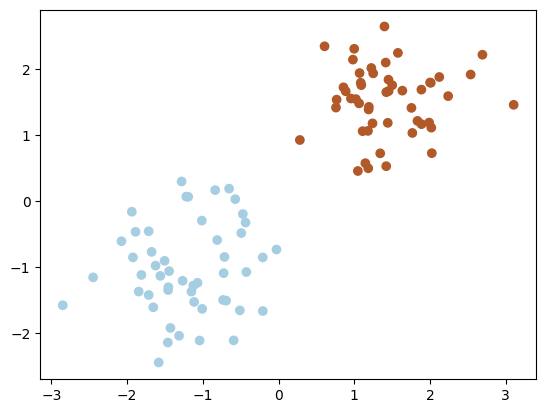

In [2]:
from sklearn import datasets
centers = [[-1.1,-1], [1.5, 1.5]]
X, y = datasets.make_blobs(n_samples=100, centers=centers, n_features=2,random_state=3,cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired);
plt.show()

We will use this function to plot SVM decision regions and support vectors

In [3]:
def plot_decision_regions(clf, X, y, ax):
    """Plot SVM decision regions."""

    # Plot boundary and margin if linear kernel.
    if clf.kernel == "linear":
        # get the separating hyperplane
        w = clf.coef_[0]
        a = -w[0] / w[1]

        xx = np.linspace(-3.5, 3.5)
        yy = a * xx - (clf.intercept_[0]) / w[1]

        # plot the parallels to the separating hyperplane that pass through the
        # support vectors (margin away from hyperplane in direction
        # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in 2-d.
        margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
        yy_down = yy - np.sqrt(1 + a ** 2) * margin
        yy_up = yy + np.sqrt(1 + a ** 2) * margin

        # plot the line, the points, and the nearest vectors to the plane
        ax.plot(xx, yy, 'k-')
        ax.plot(xx, yy_down, 'k--')
        ax.plot(xx, yy_up, 'k--')

    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
               facecolors='none', zorder=10, edgecolors='k')
    ax.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
               edgecolors='k')

    x_min = -3.5
    x_max = 3.5
    y_min = -3.5
    y_max = 3.5


    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)

    # Plot empirical decision boundary if not linear.
    if clf.kernel != "linear":
        ax.contour(XX, YY, Z, colors=['k'], linestyles=['-'], levels=[0])

    # Put the result into a color plot
    ax.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    # Set title
    ax.set_title("SVM kernel='{}', C={}, gamma={}\naccuracy={}".format(
        clf.kernel, clf.C, clf.gamma, clf.score(X, y)))

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())


### Linear SVM
We fit a linear SVM and show the margin, decision boundary and support vectors.
First we do not regularize (using a large value of the hyperparameter C ('P' in the Lectures).

You can try smaller values of C (smaller than 1) and see how the decision boundary, margins and support vectors change.

Based on: [source](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html).

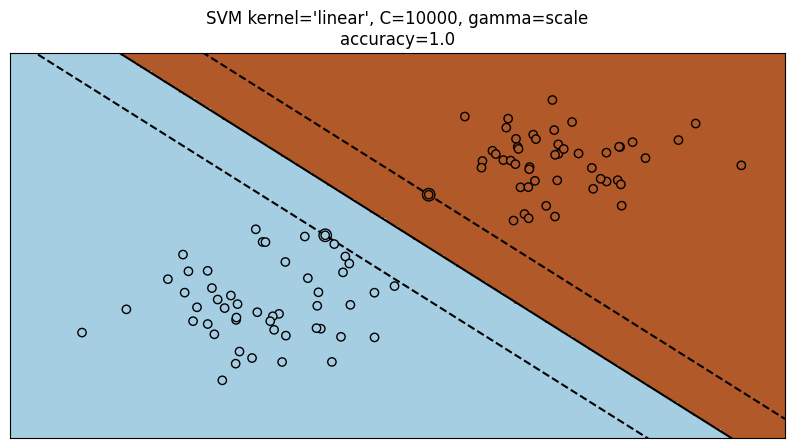

In [4]:
fig, ax1 =plt.subplots(1,figsize=(10, 5))

# Fit with C=10000 (very high, do not regularize).
clf_C1 = SVC(kernel="linear",C=10000)
clf_C1.fit(X, y)

# Plot decision boundaries.
plot_decision_regions(clf_C1, X, y, ax1)

###A non-separable dataset

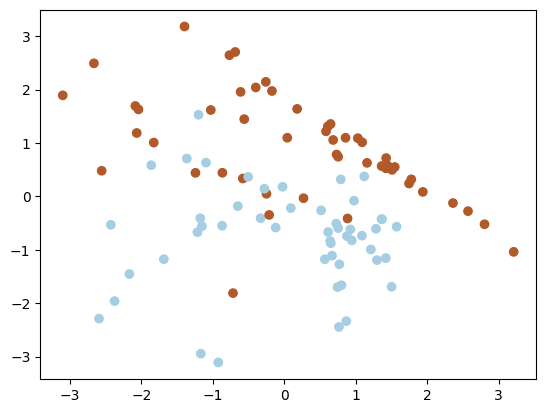

In [5]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, random_state=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired);

### Linear SVM
First, we will fit a linear SVM and illustrate the effect the parameter C.

Based on: [source](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html).

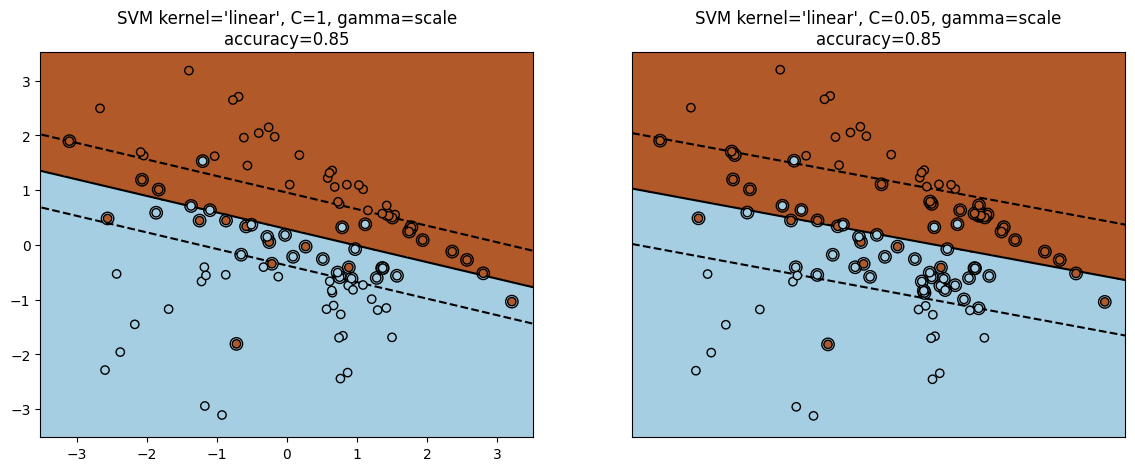

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Fit with C=1.
clf_C1 = SVC(kernel="linear", C=1)
clf_C1.fit(X, y)

# Fit with C=0.05
clf_C005 = SVC(kernel="linear", C=0.05)
clf_C005.fit(X, y)

# Plot decision boundaries.
plot_decision_regions(clf_C1, X, y, ax1)
plot_decision_regions(clf_C005, X, y, ax2)

A large value of `C` basically tells our model to only consider points close to line of separation.

A small value of `C` includes more observations, allowing the margins to be calculated using all the data in the area.

Feel free to try different values of `C`.

###SVM with polynomial kernel

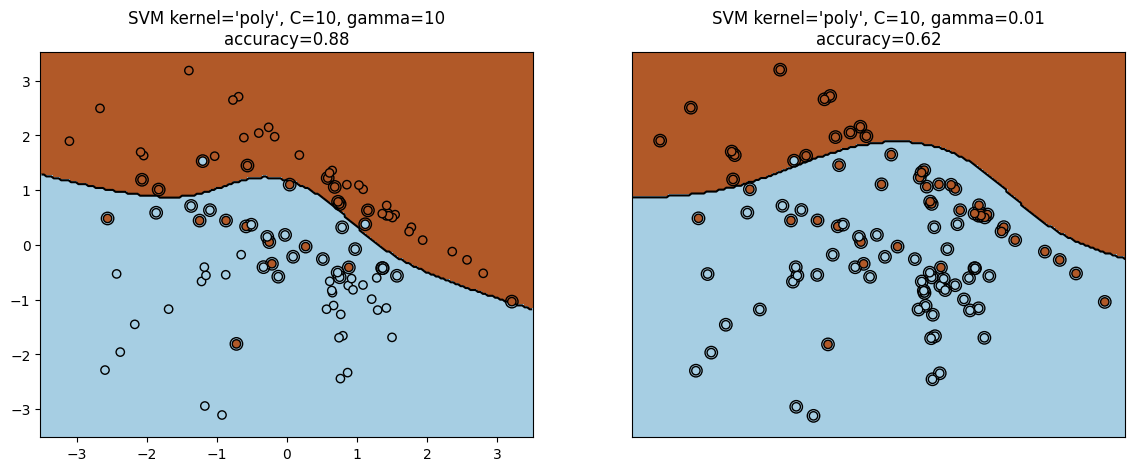

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Fit polynomial with C=10, gamma=10.
clf_g10 = SVC(kernel="poly", C=10, gamma=10)
clf_g10.fit(X, y)

# Fit gaussian with C=10, gamma=10.
clf_g001 = SVC(kernel="poly", C=10, gamma=0.01)
clf_g001.fit(X, y)

# Plot decision boundaries.
plot_decision_regions(clf_g10, X, y, ax1)
plot_decision_regions(clf_g001, X, y, ax2)

### SVM with gaussian kernel

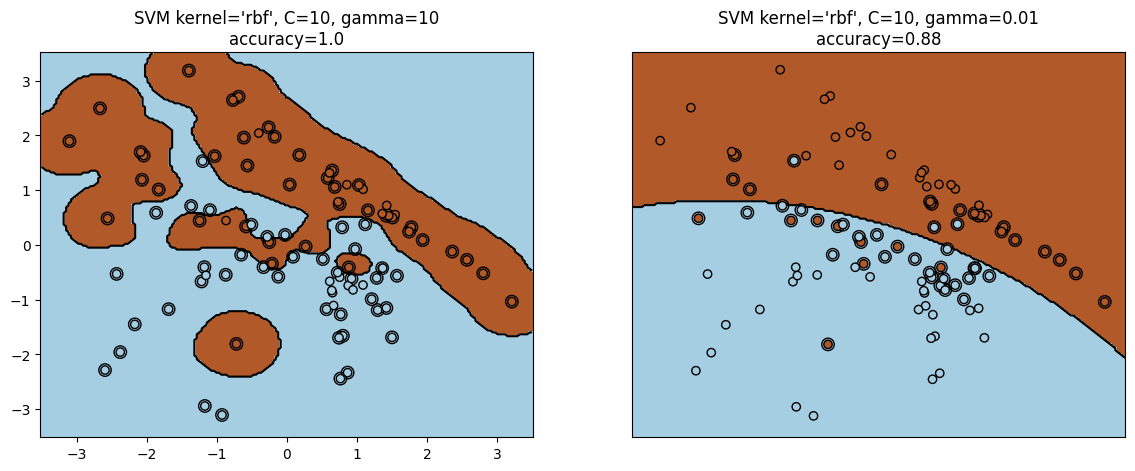

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Fit gaussian with C=10, gamma=10.
clf_g10 = SVC(kernel="rbf", C=10, gamma=10)
clf_g10.fit(X, y)

# Fit gaussian with C=10, gamma=10.
clf_g001 = SVC(kernel="rbf", C=10, gamma=0.01)
clf_g001.fit(X, y)

# Plot decision boundaries.
plot_decision_regions(clf_g10, X, y, ax1)
plot_decision_regions(clf_g001, X, y, ax2)

##Part2: Spam Dataset

## Data loading
Data available in [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/Spambase). It contains 4601 observations of 58 different variables corresponding to no-spam/spam e-mails.

The CSV file has no header, the variable names are available [here](https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names) along with a description of each one.

In [9]:
!curl -s https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names | head -n26

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

In [10]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data", header=None)

The last column indicates whether the observation is spam (1) or not (0).

In [11]:
X = data.iloc[:, :-1].to_numpy()
y = data.iloc[:,-1].to_numpy()

We split the dataset into training (80%) and test (20%) sets, using stratified splitting, that is, keeping the class proportion in each set. We set random_state to an int number for reproducible output across multiple function calls.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1, stratify=y)

## Training a linear SVM classifier

Again, we will be using a [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) object to chain multiple estimators into one. In particular, we will first [standardize](https://en.wikipedia.org/wiki/Feature_scaling#Standardization_(Z-score_Normalization)) our data, as it usually helps linear classifiers, and then apply the svm classifier.

In [13]:
model1 = Pipeline([
    ('center', StandardScaler()),
    ('clf', SVC(C=0.1, kernel="linear"))
])

In [14]:
model1.fit(X_train, y_train)

Pipeline(steps=[('center', StandardScaler()),
                ('clf', SVC(C=0.1, kernel='linear'))])

In [15]:
pred_train = model1.predict(X_train)
pred_test = model1.predict(X_test)

In [16]:
print("TRAINING\n" + classification_report(y_train, pred_train))
print("\nTESTING\n" + classification_report(y_test, pred_test))

TRAINING
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2230
           1       0.93      0.89      0.91      1450

    accuracy                           0.93      3680
   macro avg       0.93      0.92      0.92      3680
weighted avg       0.93      0.93      0.93      3680


TESTING
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       558
           1       0.94      0.90      0.92       363

    accuracy                           0.94       921
   macro avg       0.94      0.93      0.93       921
weighted avg       0.94      0.94      0.94       921



In [17]:
train_error = 1. - accuracy_score(y_train, pred_train)
train_cmat = confusion_matrix(y_train, pred_train)
test_error = 1. - accuracy_score(y_test, pred_test)
test_cmat = confusion_matrix(y_test, pred_test)

print('train error: %f ' % train_error)
print('train confusion matrix:')
print(train_cmat)
print('test error: %f ' % test_error)
print('test confusion matrix:')
print(test_cmat)

train error: 0.071739 
train confusion matrix:
[[2127  103]
 [ 161 1289]]
test error: 0.061889 
test confusion matrix:
[[536  22]
 [ 35 328]]


## Training a non-linear SVM classifier

Now, we train in model2 a non-linear SVM, using a Gaussian kernel. We first set a fix value for the hyperparameters `C` and `gamma`. Later we will try to optimize these hyperparameters.

In [18]:
model2 = Pipeline([
    ('center', StandardScaler()),
    ('clf', SVC(C=0.1, kernel="rbf", gamma=1))
])

In [19]:
model2.fit(X_train, y_train)

Pipeline(steps=[('center', StandardScaler()), ('clf', SVC(C=0.1, gamma=1))])

In [20]:
pred_train = model2.predict(X_train)
pred_test = model2.predict(X_test)

In [21]:
print("TRAINING\n" + classification_report(y_train, pred_train))
print("\nTESTING\n" + classification_report(y_test, pred_test))

TRAINING
              precision    recall  f1-score   support

           0       0.62      1.00      0.76      2230
           1       1.00      0.04      0.09      1450

    accuracy                           0.62      3680
   macro avg       0.81      0.52      0.42      3680
weighted avg       0.77      0.62      0.50      3680


TESTING
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       558
           1       1.00      0.02      0.04       363

    accuracy                           0.61       921
   macro avg       0.81      0.51      0.40       921
weighted avg       0.76      0.61      0.48       921



In [22]:
train_error = 1. - accuracy_score(y_train, pred_train)
train_cmat = confusion_matrix(y_train, pred_train)
test_error = 1. - accuracy_score(y_test, pred_test)
test_cmat = confusion_matrix(y_test, pred_test)

print('train error: %f ' % train_error)
print('train confusion matrix:')
print(train_cmat)
print('test error: %f ' % test_error)
print('test confusion matrix:')
print(test_cmat)

train error: 0.376359 
train confusion matrix:
[[2230    0]
 [1385   65]]
test error: 0.385451 
test confusion matrix:
[[558   0]
 [355   8]]


## Linear SVM hyper-parameter search
Like in the previous lab, you can use a `GridSearchCV` object to do an exhaustive search over the `C` parameter, or you can try the [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV) class to sample from a distribution over possible parameter values (see [this guide](https://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-optimization)).

Training this model for each hyper-parameter value can take quite some time, especially when doing cross-validation. As the dataset is big enough, you can avoid doing cross-validation by passing a `ShuffleSplit` (e.g., `ShuffleSplit(n_splits=1, train_size=0.75)`) or `StratifiedShuffleSplit` (for stratified splitting) as the `cv` parameter in the `GridSearchCV` constructor.

Note that we use `f1` as scoring metric instead of the default `accuracy` score.

In [23]:
Cs = [0.1, 1, 10, 100, 200]

In [24]:
grid_search1 = GridSearchCV(model1,
                           param_grid={"clf__C": Cs},
                           cv=StratifiedShuffleSplit(n_splits=1, train_size=0.75,random_state=2),
                           return_train_score=True, scoring='f1')
grid_search1.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=1, random_state=2, test_size=None,
            train_size=0.75),
             estimator=Pipeline(steps=[('center', StandardScaler()),
                                       ('clf', SVC(C=0.1, kernel='linear'))]),
             param_grid={'clf__C': [0.1, 1, 10, 100, 200]},
             return_train_score=True, scoring='f1')

Calling `predict` on a fitted GridSearchCV object will make predictions using **the best set of hyper-parameters**.

In [25]:
pred_train = grid_search1.predict(X_train)
pred_test = grid_search1.predict(X_test)

###Add the code to
1. print the classification report for the train and the test sets
2. print the error and confusion matrices for the train and test sets
3. show in the same figure two plots with the mean train and mean validation scores for each value of the hyperparameter C (results in `grid_search1.cv_results`, see the [user guide](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) )
4. show the best hyperparameter (use `grid_search1.best_params_`)


TRAINING
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2230
           1       0.93      0.90      0.91      1450

    accuracy                           0.93      3680
   macro avg       0.93      0.93      0.93      3680
weighted avg       0.93      0.93      0.93      3680


TESTING
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       558
           1       0.94      0.90      0.92       363

    accuracy                           0.94       921
   macro avg       0.94      0.93      0.93       921
weighted avg       0.94      0.94      0.94       921

train error: 0.066033 
train confusion matrix:
[[2133   97]
 [ 146 1304]]
test error: 0.062975 
test confusion matrix:
[[536  22]
 [ 36 327]]


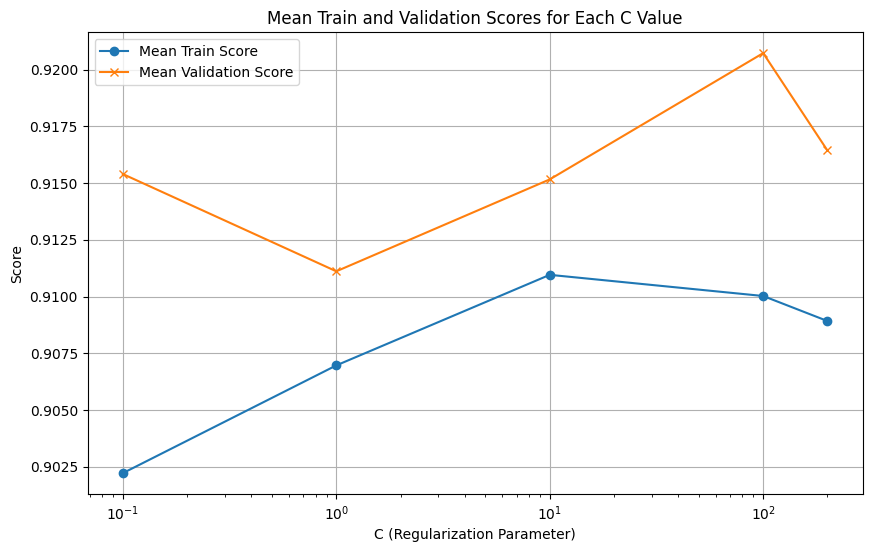

Best Hyperparameters: {'clf__C': 100}


In [26]:
## your code here
print("TRAINING\n" + classification_report(y_train, pred_train))
print("\nTESTING\n" + classification_report(y_test, pred_test))

train_error = 1. - accuracy_score(y_train, pred_train)
train_cmat = confusion_matrix(y_train, pred_train)
test_error = 1. - accuracy_score(y_test, pred_test)
test_cmat = confusion_matrix(y_test, pred_test)

print('train error: %f ' % train_error)
print('train confusion matrix:')
print(train_cmat)
print('test error: %f ' % test_error)
print('test confusion matrix:')
print(test_cmat)

mean_train_scores = grid_search1.cv_results_['mean_train_score']
mean_valid_scores = grid_search1.cv_results_['mean_test_score']
param_C = grid_search1.cv_results_['param_clf__C']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(param_C, mean_train_scores, label='Mean Train Score', marker='o')
plt.plot(param_C, mean_valid_scores, label='Mean Validation Score', marker='x')

# Labels and title
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Score')
plt.title('Mean Train and Validation Scores for Each C Value')
plt.legend()

# Display plot
plt.xscale('log')  # Log scale if C spans multiple orders of magnitude
plt.grid(True)
plt.show()

best_params = grid_search1.best_params_
print(f"Best Hyperparameters: {best_params}")


## Non-linear SVM hyper-parameter search
Now you will optimize the parameters C and h for the Gaussian SVM

In [27]:
Cs = [1, 10, 100, 200]
gammas = [1e-4, 1e-3, 1e-2, 1e-1]

###Add the code to
1. perform a GridSearchCV (**use the non linear model 'model2'**, and `param_grid={"clf__C": Cs, "clf__gamma": gammas}`)
2. make predictions on the best pair of hyperparameters
3. print the classification report for the train and the test sets (for the best hyperparameters)
4. print the error and confusion matrices for the train and test sets (for the best hyperparameters)
5. show the best hyperparameter (use `grid_search.best_params_`)

In [28]:
## your code here

#grid_search2 = GridSearchCV(model2,.....

grid_search2 = GridSearchCV(model2,
                           param_grid={"clf__C": Cs, "clf__gamma": gammas},
                           cv=StratifiedShuffleSplit(n_splits=1, train_size=0.75, random_state=2),
                           return_train_score=True, scoring='f1')

grid_search2.fit(X_train, y_train)

# Best hyperparameters from GridSearchCV
best_params = grid_search2.best_params_
print(f"Best Hyperparameters: {best_params}")

# Make predictions using the best model
best_model = grid_search2.best_estimator_

# Predictions on the training set
train_preds = best_model.predict(X_train)

# Predictions on the test set
test_preds = best_model.predict(X_test)

# Classification report for train and test sets
print("\nClassification Report (Train Set):")
print(classification_report(y_train, train_preds))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, test_preds))

train_error = 1. - accuracy_score(y_train, pred_train)
train_cmat = confusion_matrix(y_train, pred_train)
test_error = 1. - accuracy_score(y_test, pred_test)
test_cmat = confusion_matrix(y_test, pred_test)

print('train error: %f ' % train_error)
print('train confusion matrix:')
print(train_cmat)
print('test error: %f ' % test_error)
print('test confusion matrix:')
print(test_cmat)

Best Hyperparameters: {'clf__C': 100, 'clf__gamma': 0.001}

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2230
           1       0.95      0.92      0.93      1450

    accuracy                           0.95      3680
   macro avg       0.95      0.94      0.94      3680
weighted avg       0.95      0.95      0.95      3680


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       558
           1       0.94      0.91      0.92       363

    accuracy                           0.94       921
   macro avg       0.94      0.93      0.94       921
weighted avg       0.94      0.94      0.94       921

train error: 0.066033 
train confusion matrix:
[[2133   97]
 [ 146 1304]]
test error: 0.062975 
test confusion matrix:
[[536  22]
 [ 36 327]]


After training and validating the hyperparameters, plot a meshgrid with the mean train and validation scores for all pairs of hyperparameters. Use this code:

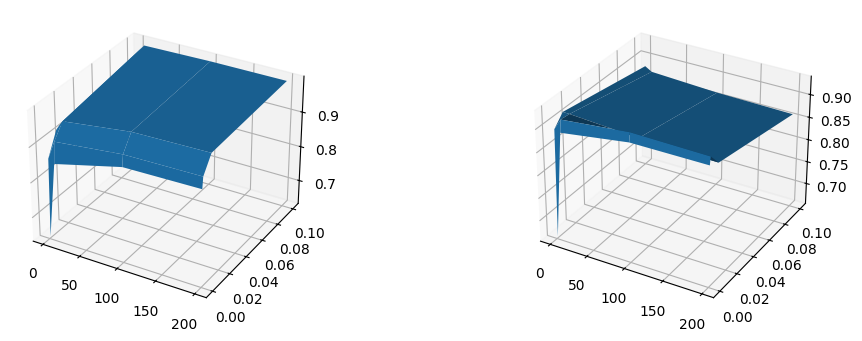

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 4))

X, Y = (np.meshgrid(Cs, gammas))

ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, np.transpose(grid_search2.cv_results_["mean_train_score"].reshape((4, 4))))
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, np.transpose(grid_search2.cv_results_["mean_test_score"].reshape((4, 4))))

You can also show the parameters and scores as a pandas DataFrame:

In [30]:
pd.concat([pd.DataFrame(grid_search2.cv_results_["params"]),pd.DataFrame(grid_search2.cv_results_["mean_test_score"], columns=["F1"])],axis=1)


,clf__C,clf__gamma,F1
0,1,0.0001,0.659381
1,1,0.0010,0.894587
2,1,0.0100,0.917251
3,1,0.1000,0.881752
4,10,0.0001,0.892704
5,10,0.0010,0.919220
6,10,0.0100,0.916898
7,10,0.1000,0.872832
8,100,0.0001,0.914446
9,100,0.0010,0.934247


In *Support Vector Machines (SVM)*, both **C** and **gamma** are hyperparameters that influence the behavior of the model. Here's what they control and how they affect the performance:

---

### **1. C: Regularization Parameter**
- *Controls the trade-off between margin size and classification accuracy.*
- Affects the cost of misclassified points (slack variables) in the optimization process.

#### How it works:
- **Small C**:  
  - Prioritizes a larger margin at the cost of allowing more misclassifications.  
  - Leads to a simpler, more generalized model.  
  - Helps prevent overfitting.  

- **Large C**:  
  - Penalizes misclassifications heavily, leading to a smaller margin that fits the data tightly.  
  - Increases the risk of overfitting.  

---

### **2. gamma: Kernel Coefficient (for non-linear kernels like RBF)**
- *Defines how far the influence of a single training point extends.*
- Only applies to certain kernels, like RBF, poly, or sigmoid.

#### How it works:
- **Small gamma**:  
  - The influence of each training point is spread over a wide region.  
  - Results in a smoother decision boundary, with less sensitivity to individual points.  
  - Suitable for datasets with simpler structures.  

- **Large gamma**:  
  - The influence of each training point is limited to a smaller region.  
  - Results in a more complex decision boundary, capturing finer details.  
  - Risk of overfitting on noisy data.  

---

### Interaction between C and gamma
- **C** controls how strictly the margin is enforced, while **gamma** determines the shape of the decision boundary in the feature space.
- If both **C** is high and **gamma** is large:
  - The model might overfit, capturing noise as patterns.
- If both are small:
  - The model might underfit, failing to capture the underlying structure.

---

### Choosing the values
- *Grid search* or *random search* combined with cross-validation is typically used to find the optimal combination of C and gamma.
